# Assignment

In this assignment, we want to read in the `retail-churn.csv` dataset and run some EDA on the data. Generally speaking, when we run EDA on a dataset, we don't have a particular goal in mind. Instead we want to get a "gut-feel" for what the data looks like. The goal of the assignment is to show your ability to examine a dataset with increasing depth as you go.

In [108]:
import pandas as pd
import numpy as np
#import datetime

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("retail-churn.csv", sep = ",", skiprows = 1, names = col_names)
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


Here I am importing pandas and numpy. I didn't need datetime. 
I copy and pasted this from the in class assignment. It worked. 

In [11]:
"""
Pivot the dataframe so that each column corresponds to a single day,
and each row is an aggregate function output on a given variable for that day.

_timestamp_ = timestamp of the day 
_weekday_ = numeric mapping for day of the week s.t. {0-6:'Sun'-'Sat'}
_transactions_ = number of transactions per day (unique is implied by the data structure)
_unique_users_ = number of unique users per day
_items_ = number of unique items sold
_total_quantity_ = total quantity of goods sold
_avg_quantity_ = average quantity of goods sold per transaction
_total_value_ = total revenue from goods sold taht day (sum of all dollar amounts)
_avg_value_ = average value of each transaction
"""

agg_data_byday = pd.DataFrame({'timestamp':list(churn.groupby('timestamp')['timestamp'].agg(lambda x: x.unique())),
                               'weekday': [pd.Timestamp(ts).weekday() for ts in list(churn.groupby('timestamp')['timestamp'].agg(lambda x:x.unique()))],
                               'transactions': list(churn.groupby('timestamp')['trans_id'].count()),
                               'unique_users': list(churn.groupby('timestamp')['user_id'].agg(lambda x: len(x.unique()))),
                               'items': list(churn.groupby('timestamp')['item_id'].agg(lambda x: len(x.unique()))),
                               'total_quantity': list(churn.groupby('timestamp')['quantity'].sum()),
                               'avg_quantity': list(churn.groupby('timestamp')['quantity'].agg(np.mean)),
                               'total_value': list(churn.groupby('timestamp')['dollar'].sum()),
                               'avg_value': list(churn.groupby('timestamp')['dollar'].agg(np.mean))})

agg_data_byday

,timestamp,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value
0,1/1/2001 0:00,0,3508,462,253,4600,1.311288,407119,116.054447
1,1/10/2001 0:00,2,1231,233,124,1716,1.393989,160598,130.461413
2,1/11/2001 0:00,3,1446,254,147,1959,1.354772,210508,145.579530
3,1/12/2001 0:00,4,1579,255,143,2212,1.400887,212543,134.606080
4,1/13/2001 0:00,5,3394,432,261,4589,1.352092,512847,151.104007
...,...,...,...,...,...,...,...,...,...
115,2/5/2001 0:00,0,1909,319,172,2591,1.357255,224437,117.567837
116,2/6/2001 0:00,1,1744,289,163,2554,1.464450,219841,126.055619
117,2/7/2001 0:00,2,1557,264,135,2172,1.394990,186324,119.668593
118,2/8/2001 0:00,3,1481,261,143,2157,1.456448,199649,134.806887


This is Ben's and it works really well. It is very elaborate. It creates new columns and eliminates unnecessary ones. Ultimately it is 120 rows specifc by day and everything that happened on that day.

In [12]:
agg_data_byday.shape

(120, 9)

Just looking at the shape here, also shown above, 9 columns, 120 rows. This is way less than churn which was 252203 rows and 9 columns.

In [13]:
type(agg_data_byday)

pandas.core.frame.DataFrame

I am making sure the dataframe i created is in fact a dataframe. I have surprised myself sometimes.

In [14]:
print(agg_data_byday.dtypes)

timestamp          object
weekday             int64
transactions        int64
unique_users        int64
items               int64
total_quantity      int64
avg_quantity      float64
total_value         int64
avg_value         float64
dtype: object


A quick look at all the column header types. This are all good but occasionally they need to be changed. I changed two of the churn dataframe columns like data from integer to float (for decimals) and item_id from float to integer (no reason to have decimals on a item id.

import datetime
#import numpy as np
# unit='s' to convert it into epoch time
#churn['Datetime'] = pd.to_datetime(churn['timestamp'])#, unit='s')
churn['Date'] = pd.to_datetime(churn['timestamp']).dt.strftime('%m/%d/%Y')
#churn.timestamp.strftime('%m - %d - %y')

# From the lesson (HINT: You will need to convert `timestamp` into an a `datetime` column.
#You can use `pd.to_datetime` for that. We leave it to you to learn more about working with `datetime` colums.)
# checking our dataframe once again
churn.head()

#del churn('timestamp')
#del churn('Modified Datetime')
#del churn.timestamp
churn.drop(['timestamp'], axis=1, inplace=True)
churn.head()

the above two items were not needed for the agg_data_byday dataframe. It was needed for the churn df but I needed more understanding of why.

In [15]:
agg_data_byday.index

RangeIndex(start=0, stop=120, step=1)

Just checking the range index here, mostly just trying new code. Everything is new to me.

Here are some examples of questions we can be asking:

1. What are the columns, their types and their distribution (when it makes sense)? <span style="color:red" float:right>[1 point]</span>

In [17]:
# What are the columns?
list(agg_data_byday.columns)

['timestamp',
 'weekday',
 'transactions',
 'unique_users',
 'items',
 'total_quantity',
 'avg_quantity',
 'total_value',
 'avg_value']

Listed the columns from the dataframe nicely with this code. The output is quickly referrable for later code.

In [18]:
# What are their types?
agg_data_byday.dtypes

timestamp          object
weekday             int64
transactions        int64
unique_users        int64
items               int64
total_quantity      int64
avg_quantity      float64
total_value         int64
avg_value         float64
dtype: object

Checking datatypes of the agg_data_byday df. They did not need to be changed.

In [19]:
# What is their distribution (when it makes sense)?
agg_data_byday.describe()

,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2.991667,2101.700000,308.816667,172.866667,2912.308333,1.393256,275136.466667,130.071397
std,2.002082,1217.639828,130.160210,75.561643,1649.956948,0.117016,163390.720797,23.025708
min,0.000000,167.000000,23.000000,18.000000,230.000000,1.225131,14121.000000,73.931937
25%,1.000000,1403.250000,248.000000,132.000000,1956.750000,1.325366,182209.500000,117.656958
50%,3.000000,1824.500000,296.000000,156.000000,2563.000000,1.365582,235626.500000,126.216818
75%,5.000000,2806.250000,392.500000,218.250000,3785.500000,1.428883,360170.250000,138.651957
max,6.000000,6402.000000,685.000000,398.000000,8727.000000,2.099330,860226.000000,224.650424


This is the describe code. What is unique is everything has decimals, like temporary floats. I noticed there was no "Top" in here like there was when we ran code during class. I wonder how you get top. I think it would be great to go over these with someone who knew these well.

2. Do the columns have the right types for the analysis? If not, convert them to the right type. <span style="color:red" float:right>[1 point]</span>

I checked above and felt that all the types in the agg_data_byday worked well. When i used churn, it needed two data types changed, as mentioned above.

In [20]:
agg_data_byday.head()

,timestamp,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value
0,1/1/2001 0:00,0,3508,462,253,4600,1.311288,407119,116.054447
1,1/10/2001 0:00,2,1231,233,124,1716,1.393989,160598,130.461413
2,1/11/2001 0:00,3,1446,254,147,1959,1.354772,210508,145.579530
3,1/12/2001 0:00,4,1579,255,143,2212,1.400887,212543,134.606080
4,1/13/2001 0:00,5,3394,432,261,4589,1.352092,512847,151.104007


Looking at the head of the agg df. i think the avg value & avg quantity could be minimized to two digits after the decimal. No reason to see one million numbers after the decimal. I also don't think we need the hour and seconds in the timestamp. How to remove that and if I do, will it mess previous/future code?

In [41]:
agg_data_byday.weekday

0      0
1      2
2      3
3      4
4      5
      ..
115    0
116    1
117    2
118    3
119    4
Name: weekday, Length: 120, dtype: int64

There is a question about total weeks coming up and I ra this to determine how many weeks were in the df.

3. Do any columns appear to have all rows with unique categories? How do we show that? <span style="color:red" float:right>[1 point]</span>

In [24]:
#Yes address is E or G
#what is meant by categories?
agg_data_byday.avg_value.unique()

array([116.05444698, 130.46141348, 145.57952974, 134.6060798 ,
       151.10400707, 128.49467035, 143.73397244, 165.48063462,
       156.77410575, 149.87265918, 146.83349101, 115.06111834,
       169.15293861, 134.3683224 , 131.1463337 , 120.13191206,
       157.88396349, 142.1575663 , 123.59852051, 132.09202814,
       143.37025948, 176.78870432, 224.65042373, 164.8772846 ,
       159.99296675, 162.04071247, 110.24675325, 109.10786699,
       115.89056356, 166.69891789, 128.00184672,  82.09907121,
       119.40902101, 128.6638084 , 118.78869779, 127.62607099,
       150.39572193, 139.10954848, 139.46944858, 133.12374886,
       115.49604661, 114.15765766, 105.3430112 , 111.37537538,
       119.60338484, 159.36918991, 139.61605416, 138.95425934,
       138.5511902 , 152.10578474, 115.59560947, 163.25332651,
       137.98207496, 121.03593978, 141.9503012 , 128.61057692,
       115.58221939, 116.09948187, 120.84159061, 132.18961039,
       110.18031992, 123.08196721, 128.4845447 , 134.79

120 unique values?!?! what makes them unique or is it just a fancy word for every value within a column ie avg value...

In [27]:
agg_data_byday.avg_value.value_counts()

116.054447    1
130.461413    1
122.902238    1
127.331887    1
128.982937    1
             ..
127.626071    1
118.788698    1
128.663808    1
119.409021    1
107.941576    1
Name: avg_value, Length: 120, dtype: int64

I do this unique value/value counts combo for every column. There are outputs for each. Do I really need to show each one of these combo codes for every column or am I looking for something in particular.

In [45]:
churn.gender.unique() #what do these letters mean?

array(['F', 'G', 'I', 'C', 'J', 'E', 'D', 'H', 'K', 'B', 'A'],
      dtype=object)

In [46]:
churn.gender.value_counts()

D    52987
E    48298
C    43463
F    31637
B    21842
G    16837
A     9658
J     8172
H     7175
K     6197
I     5938
Name: gender, dtype: int64

In [47]:
churn.address.unique() #what do these letters mean?

array(['E', 'H', 'D', 'F', 'G', 'C', 'B', 'A'], dtype=object)

In [48]:
churn.address.value_counts()

E    95740
F    75671
G    23816
C    21689
D    12075
H    12008
A     5904
B     5301
Name: address, dtype: int64

In [51]:
churn.store_id.unique()

array([  2860,   2861,   2862, ..., 251840, 251841, 251842])

In [52]:
churn.store_id.value_counts()

2860      1
213277    1
213279    1
213280    1
213281    1
         ..
191971    1
191972    1
191973    1
191974    1
251842    1
Name: store_id, Length: 252204, dtype: int64

In [53]:
churn.trans_id.unique()

array([ 818463,  818464,  818465, ..., 1630931, 1631033, 1631048])

In [54]:
churn.trans_id.value_counts()

818463     1
1361282    1
1361649    1
1361755    1
1362185    1
          ..
1067792    1
1067890    1
1067892    1
1067896    1
1631048    1
Name: trans_id, Length: 252204, dtype: int64

In [55]:
churn.item_id.unique()

array([4710000000000,  615000000000, 8800000000000, ...,      20461492,
            20434090,      20192310])

In [56]:
churn.item_id.value_counts()

4710000000000    181704
4720000000000     18024
4900000000000      8014
9310000000000      1783
2250000000000      1643
                  ...  
41554696431           1
20561024              1
20505868              1
20521110              1
20192310              1
Name: item_id, Length: 2818, dtype: int64

In [57]:
churn.quantity.unique()

array([   1,    8,    2,    4,    3,    6,    5,   20,   24,   10,   12,
         15,    7,   22,   18,   29,   23,   39,    9,   13,   17,   14,
         33,   11,   36,   16,   60,   21,   48,   72,  852,   30,   27,
         19,  200,  720,  150,   96,   25,   31,   37,  479, 1200,   44,
         50,   28,   38,   35,   74,   69,   62,  168,   68,  111,   54,
         70,   26,   32,   40,   79,   51,   34])

In [58]:
churn.quantity.value_counts()

1      197394
2       39835
3        7023
4        3586
6        2013
        ...  
96          1
720         1
852         1
29          1
34          1
Name: quantity, Length: 62, dtype: int64

In [59]:
churn.dollar.unique()

array([  37.,   17.,   23., ..., 1158., 1797., 1788.])

In [60]:
churn.dollar.value_counts()

99.00       6264
59.00       4160
38.00       4157
89.00       4014
69.00       4009
            ... 
2,257.00       1
2,910.00       1
1,154.00       1
1,114.00       1
1,788.00       1
Name: dollar, Length: 1602, dtype: int64

In [61]:
churn.Date.unique()

array(['11/01/2000', '11/02/2000', '11/03/2000', '11/04/2000',
       '11/05/2000', '11/06/2000', '11/07/2000', '11/08/2000',
       '11/09/2000', '11/10/2000', '11/11/2000', '11/12/2000',
       '11/13/2000', '11/14/2000', '11/15/2000', '11/16/2000',
       '11/17/2000', '11/18/2000', '11/19/2000', '11/20/2000',
       '11/21/2000', '11/22/2000', '11/23/2000', '11/24/2000',
       '11/25/2000', '11/26/2000', '11/27/2000', '11/28/2000',
       '11/29/2000', '11/30/2000', '12/01/2000', '12/02/2000',
       '12/03/2000', '12/04/2000', '12/05/2000', '12/06/2000',
       '12/07/2000', '12/08/2000', '12/09/2000', '12/10/2000',
       '12/11/2000', '12/12/2000', '12/13/2000', '12/14/2000',
       '12/15/2000', '12/16/2000', '12/17/2000', '12/18/2000',
       '12/19/2000', '12/20/2000', '12/21/2000', '12/22/2000',
       '12/23/2000', '12/24/2000', '12/25/2000', '12/26/2000',
       '12/27/2000', '12/28/2000', '12/29/2000', '12/30/2000',
       '12/31/2000', '01/01/2001', '01/02/2001', '01/03

In [62]:
churn.Date.value_counts()

01/21/2001    6402
01/22/2001    6287
01/14/2001    5066
11/05/2000    4713
01/20/2001    4577
              ... 
12/23/2000     296
12/21/2000     191
12/19/2000     190
12/20/2000     169
12/22/2000     167
Name: Date, Length: 120, dtype: int64

In [28]:
for column in agg_data_byday.columns:
    print('###################')
    print(agg_data_byday[column].value_counts())

###################
1/1/2001 0:00      1
1/10/2001 0:00     1
12/6/2000 0:00     1
12/5/2000 0:00     1
12/4/2000 0:00     1
                  ..
11/13/2000 0:00    1
11/12/2000 0:00    1
11/11/2000 0:00    1
11/10/2000 0:00    1
2/9/2001 0:00      1
Name: timestamp, Length: 120, dtype: int64
###################
2    18
0    17
3    17
4    17
5    17
6    17
1    17
Name: weekday, dtype: int64
###################
1669    2
3508    1
167     1
1383    1
1641    1
       ..
1870    1
1634    1
4070    1
3382    1
1472    1
Name: transactions, Length: 119, dtype: int64
###################
296    3
377    2
248    2
456    2
513    2
      ..
266    1
514    1
430    1
351    1
261    1
Name: unique_users, Length: 107, dtype: int64
###################
253    3
186    3
144    3
170    3
125    3
      ..
168    1
190    1
262    1
303    1
135    1
Name: items, Length: 87, dtype: int64
###################
2015    2
4600    1
2833    1
2295    1
1905    1
       ..
1975    1
2728    1
2319

This code worked. It came from the lesson. I do not know exactly what it is used for. I also don't know the exact number of hash tags necessary or why we need a million hashtags at all.... 

4. What are some "obvious" questions we can ask about the data? We can ask many questions here, but we limit it to two:
   - Is quantity or volume ever negative and why? <span style="color:red" float:right>[1 point]</span>
   - What is the date range covered by the data? <span style="color:red" float:right>[1 point]</span>  
     HINT: You will need to convert `timestamp` into an a `datetime` column. You can use `pd.to_datetime` for that. We leave it to you to learn more about working with `datetime` colums.

In [30]:
import pandas as pd
import numpy as np
# you need to run the following line to produce visualizations in a jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#vis = pd.read_csv('retail-churn.csv', sep = ',', header = None, index_col=None, #usecols=None, engine=None, skiprows=None, nrows=None  
#                  names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar'])


#vis = pd.read_csv('retail-churn.csv', sep = ',', header = None, index_col=None, #usecols=None, engine=None, skiprows=None, nrows=None  
#                  names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'item_id', 'quantity', 'dollar', 'Date'])

#vis = pd.read_csv('retail-churn.csv', sep = ',', header = None, index_col=None, 
#names = ['Date', 'quantity', 'dollar'])

#vis.head()

These imports are in preparation for the data visualization of the df.

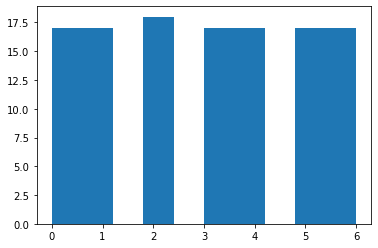

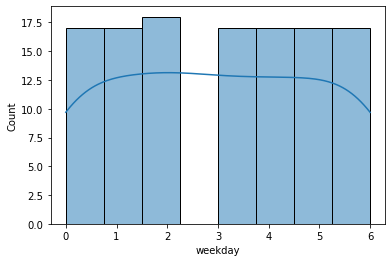

In [40]:
plt.hist(agg_data_byday['weekday']);
plt.show()
sns.histplot(agg_data_byday["weekday"], kde = True); # sns.distplot(auto["mpg"]);
plt.show()

The question does not ask for this. This is me testing what we learn in the lesson on the df.

In [32]:
agg_data_byday.corr()

,weekday,transactions,unique_users,items,total_quantity,avg_quantity,total_value,avg_value
weekday,1.000000,0.457869,0.322854,0.427380,0.437843,-0.174672,0.413786,-0.113634
transactions,0.457869,1.000000,0.944128,0.968475,0.990347,-0.112519,0.972150,0.063496
unique_users,0.322854,0.944128,1.000000,0.929332,0.950013,-0.000693,0.920677,0.128319
items,0.427380,0.968475,0.929332,1.000000,0.956306,-0.136196,0.957826,0.139148
total_quantity,0.437843,0.990347,0.950013,0.956306,1.000000,0.015902,0.973706,0.100118
avg_quantity,-0.174672,-0.112519,-0.000693,-0.136196,0.015902,1.000000,-0.039856,0.349837
total_value,0.413786,0.972150,0.920677,0.957826,0.973706,-0.039856,1.000000,0.248884
avg_value,-0.113634,0.063496,0.128319,0.139148,0.100118,0.349837,0.248884,1.000000


I believe this is what the question is asking for. To answer the question, there are negative numbers on quantity (there is not a column named volume but quantity is the same) on display using this code. But why.... So total quantity does not have a negative but average quantity does. I am not sure why average quantity does.

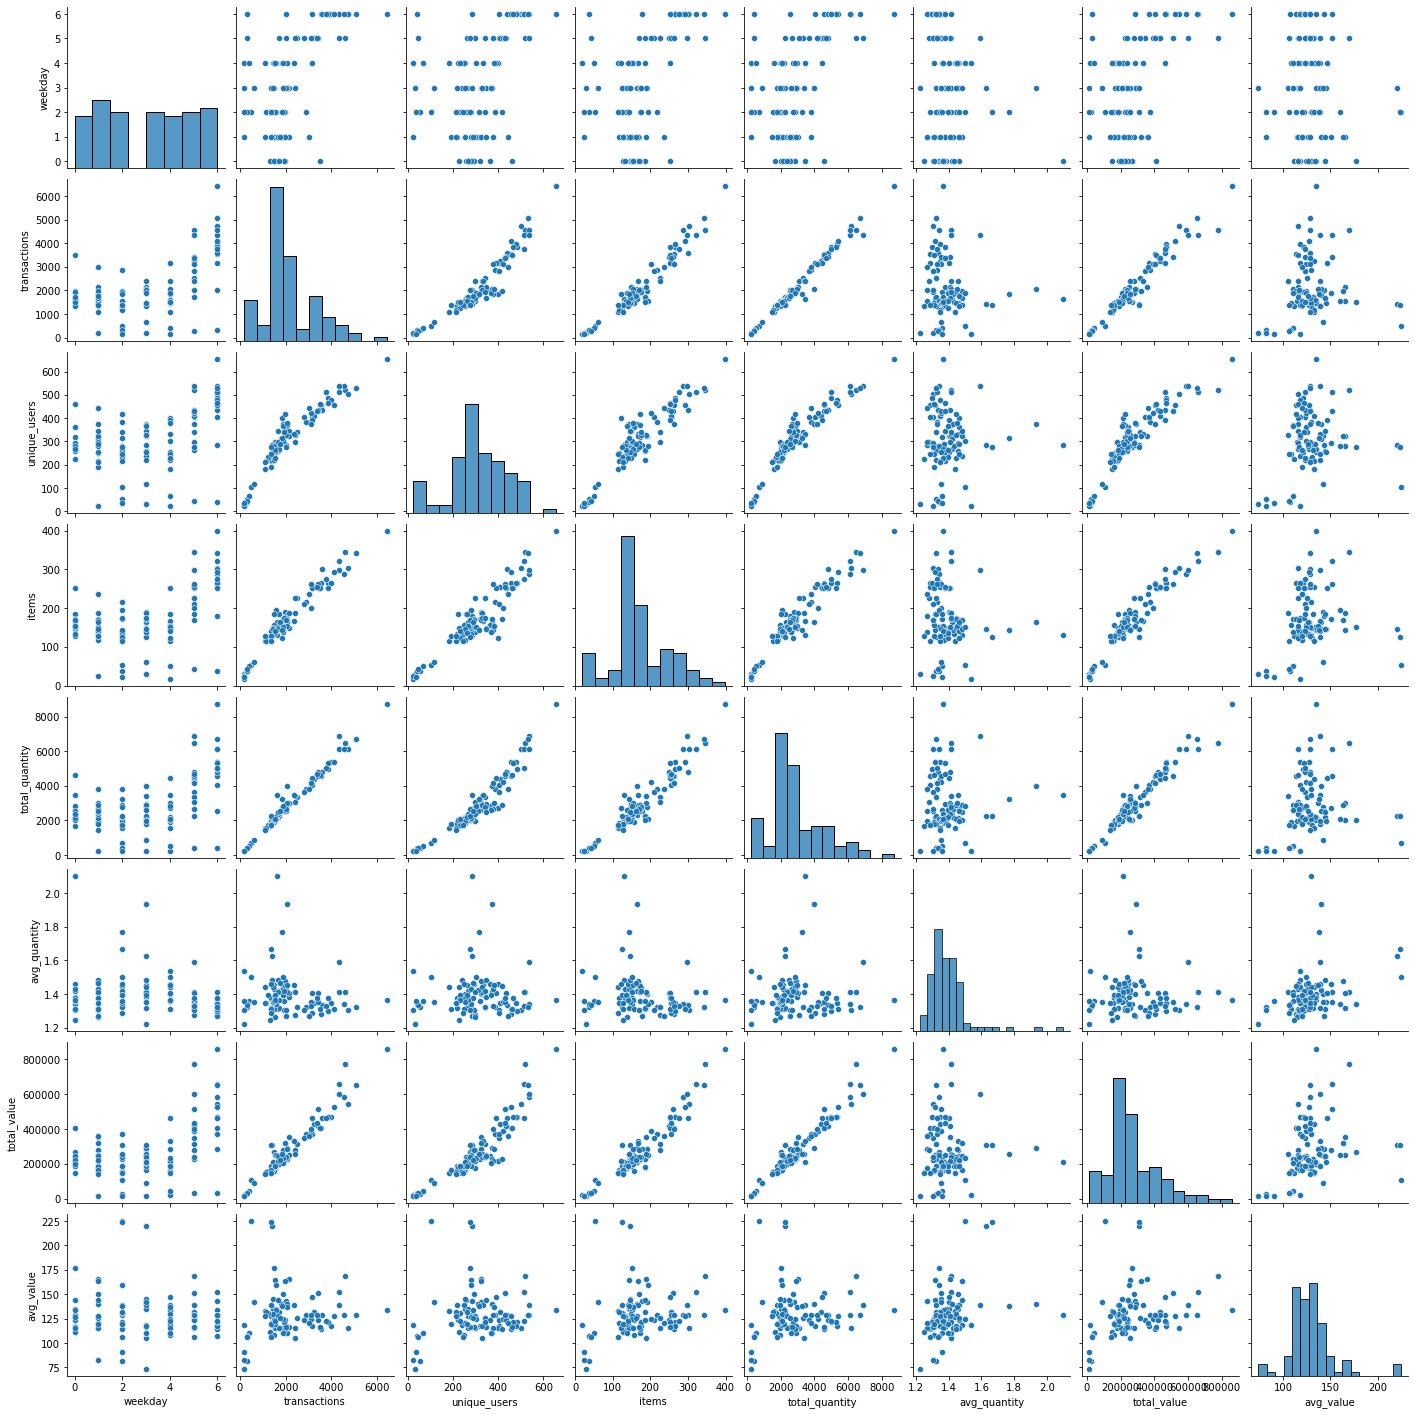

In [33]:
sns.pairplot(agg_data_byday.sample(100));

This data vis is an eye sore. I would love a breakdwon of each of these graphs/hist/etc and I would like to know why they need to be bundled like this.

In [85]:
#What is the date range covered by the data?
churn.timestamp.value_counts()

1/21/2001 0:00     6402
1/22/2001 0:00     6287
1/14/2001 0:00     5066
11/5/2000 0:00     4713
1/20/2001 0:00     4577
                   ... 
12/23/2000 0:00     296
12/21/2000 0:00     191
12/19/2000 0:00     190
12/20/2000 0:00     169
12/22/2000 0:00     167
Name: timestamp, Length: 120, dtype: int64

This code shows the date range of the data. I used the churn df instead of the agg df b/c the agg df was bunched together by date. I did not know exactly how to pull that answer from the agg df. I could try aggdf.weekday.value_counts()...

In [97]:
churn.sort_values(by = ['timestamp'], ascending = [True], inplace = True)
#churn.sort_values(by=['timestamp'])
churn.timestamp.iloc[:] #spot check for sorting
#churn.sort_values(by='timestamp', ascending=False, na_position='first')
#churn.filter(like = 'timestamp', axis = 1)

123980    1/1/2001 0:00
121691    1/1/2001 0:00
121679    1/1/2001 0:00
121742    1/1/2001 0:00
121681    1/1/2001 0:00
              ...      
207340    2/9/2001 0:00
207425    2/9/2001 0:00
207595    2/9/2001 0:00
207423    2/9/2001 0:00
207875    2/9/2001 0:00
Name: timestamp, Length: 252204, dtype: object

5. What are some "not-so-obvious" questions we can ask about this data? What are some important summary statistics and visualizations we should look at to answer them? Note that having domain knowledge can make this easier, so here's a list of questions and your task is to pick at least two questions and answer them using statistical summaries or visualizations:
   - How many transactions on average do users have in a given week? <span style="color:red" float:right>[2 point]</span>
   - Are there items that are more commonly sold in bulk (quantity greater than 1)? <span style="color:red" float:right>[2 point]</span>
   - How do quantity and volume tend to change over the course of the day (hour by hour)? <span style="color:red" float:right>[2 point]</span>
Note that the above questions are intetionally phrased to sound non-technical. It is up to you to "translate" them into something that can be answered by a query on the data or a visualization.

In [51]:
# How many transactions on average do users have in a given week?
#total transactions / week
agg_data_byday.transactions.sum()                  

252204

In [48]:
agg_data_byday.weekday.value_counts()

2    18
0    17
3    17
4    17
5    17
6    17
1    17
Name: weekday, dtype: int64

In [57]:
# How many transactions on average do users have in a given week?
ques_1 = 252204 // 17
print("The number of transactions on average by users per week is:", ques_1)

The number of transactions on average by users per week is: 14835


In [68]:
#Are there items that are more commonly sold in bulk (quantity greater than 1)?
#agg_data_byday.items >1
#churn[churn.items.quantity > 1]
#df[df.b > 10]
len(agg_data_byday[(agg_data_byday['items']>= 2)]) #& (df['pos']=='Gu') & (df['points']>12)])
#print("The 

120

6. Do the results mesh with what we expected? Note that to answer this we need to have some domain knowledge, so you can ignore this for the assignment. <span style="color:red" float:right>[0 point]</span>

7. What are additional features we could extract from the data? This is especially relevant if the data contains a timestamp column or raw text column (such as a full address for example). <span style="color:red" float:right>[1 point]</span>

In [ ]:
#Total taxes (if tax amount known) on total value by year, day, or timeframe
#Most or least sold items by month
#Average quantity sold per day of week, Reason: Stock more of that item day before or put more people on shift that day of week

8. Do I see any relationships between the features in the data? You will need to back this up with some statistical summaries or visualizations like what we covered in the lab. <span style="color:red" float:right>[2 point]</span>

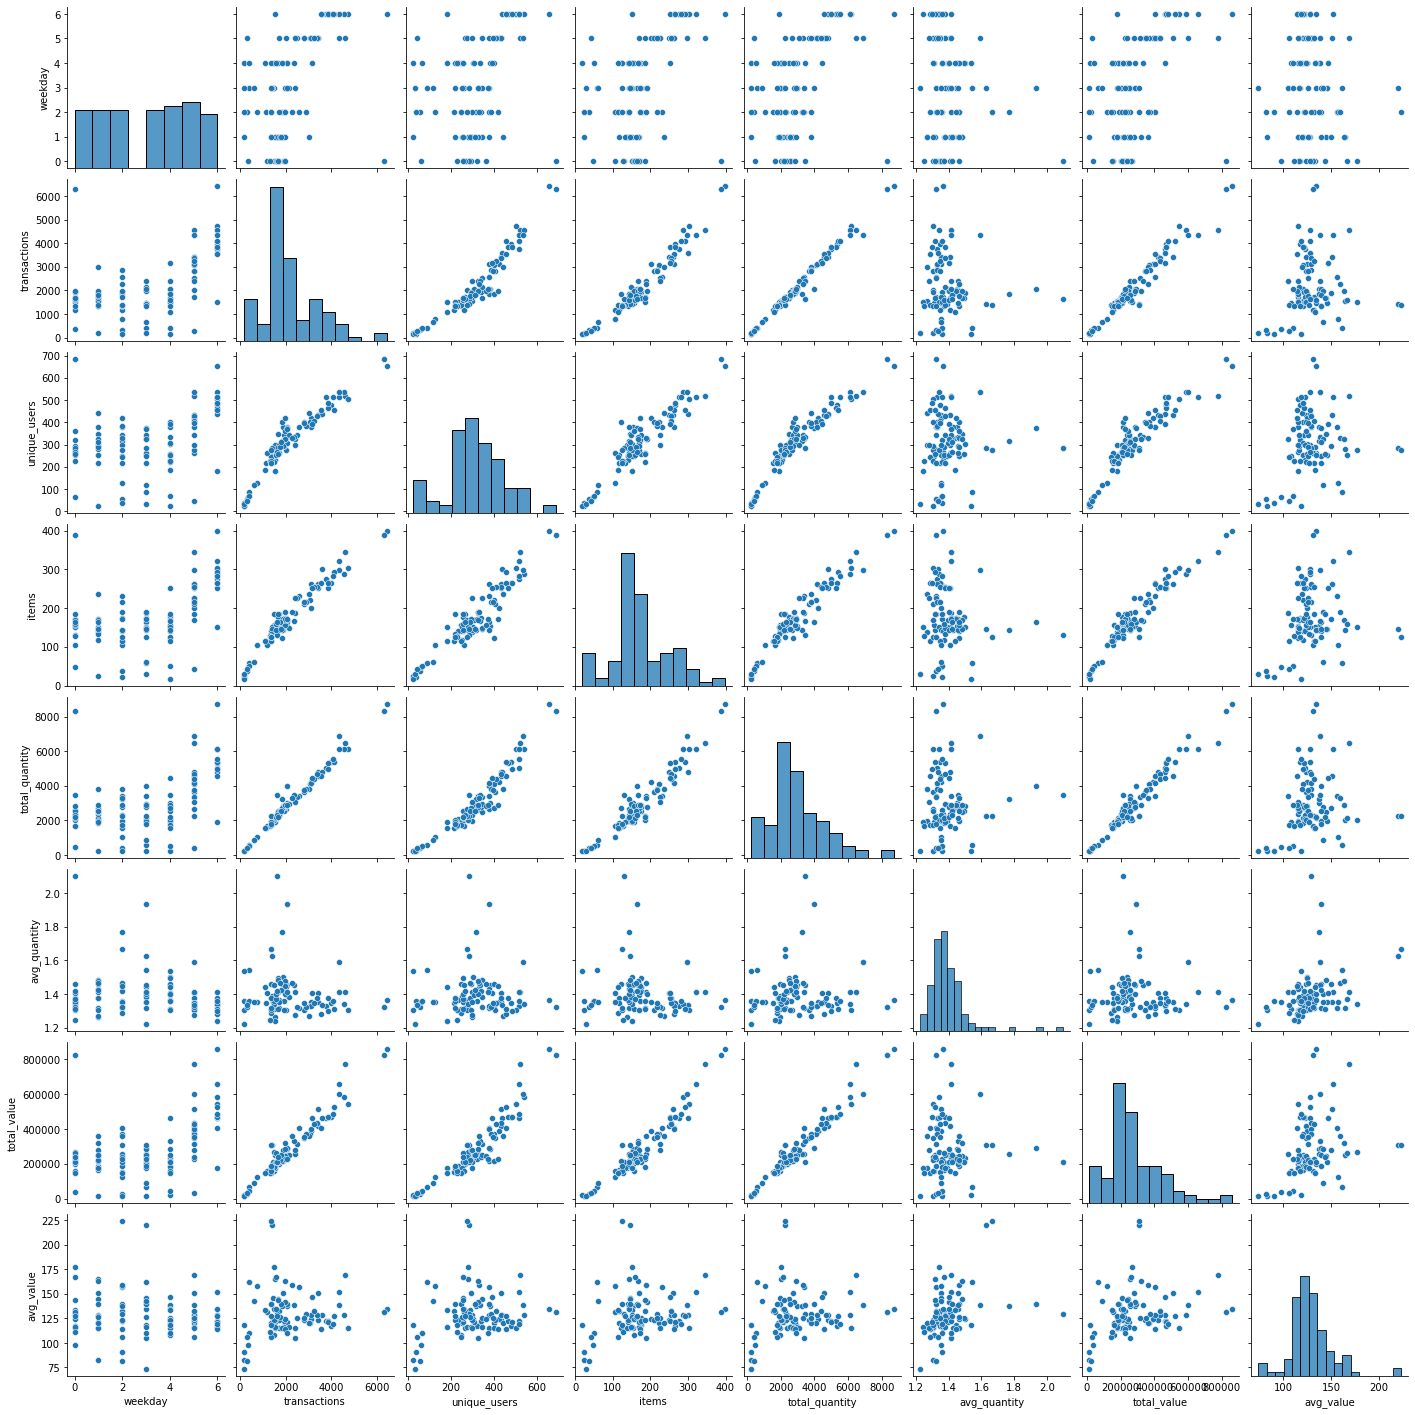

In [106]:
sns.pairplot(agg_data_byday.sample(100));

<AxesSubplot:>

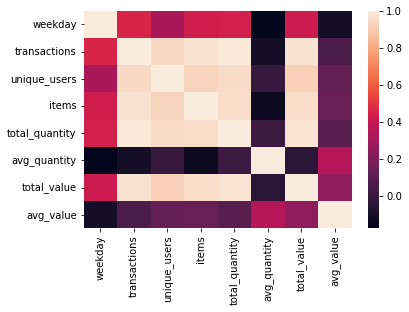

In [71]:
sns.heatmap(agg_data_byday.corr())

<AxesSubplot:>

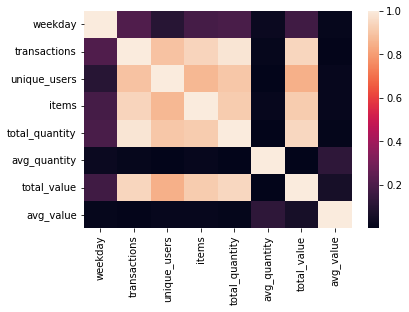

In [72]:
sns.heatmap(agg_data_byday.corr()*agg_data_byday.corr())

Run EDA on the data and answer the above questions and any additional questions that may cross your mind along the way. As you can imagine, there isn't a single way to proceed, and the answer doesn't always have to be exact. It is up to you to decide how you want to convey the results, but assume that your audience is non-technical and not familiar with some of the terminology we learned in the lecture.

There are also third-party libraries we can used to run EDA. One example is the `pandas-profiling` library which provides us with a full report. You do not need to use it in this assignment, but we recommend that you install it and take a look on your own time.

In [104]:
!pip install ydata-profiling

from pandas_profiling import ProfileReport
prof = ProfileReport(agg_data_byday)
prof.to_file(output_file='Lesson_04.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# End of assignment